<a href="https://colab.research.google.com/github/xMatuszek/polish_receipts/blob/main/Receipts_using_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLOV9

Przykład dzielenia na klasy:
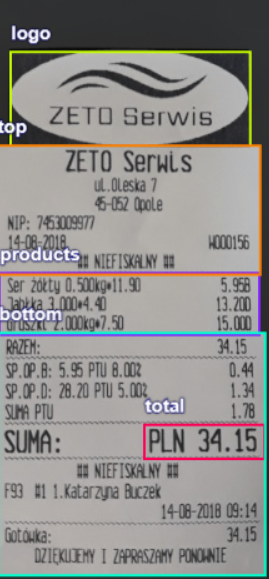

### Pobieramy yolo w wersji v9 oraz instalujemy potrzebne biblioteki

In [1]:
!git clone https://github.com/WongKinYiu/yolov9
%cd yolov9
!pip3 install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 668 (delta 222), reused 199 (delta 199), pack-reused 378
Receiving objects: 100% (668/668), 3.22 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (269/269), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.2 MB/s eta 0:00:00


### Importujemy baze z roboflow
Możemy też to zrobić bezpośrednio z naszego dysku lub podłączyć dysk do colaba

In [1]:
%cd /content/yolov9
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="N4W5iwCqB7SAr2kP1z6c")
project = rf.workspace("tomasz-pyszka-i95pe").project("receipts-er6ly")
version = project.version(2)
dataset = version.download("yolov9")




/content/yolov9
loading Roboflow workspace...
loading Roboflow project...


### Przypisujemy zmienne do katalogów.
**HOME** wskazuje na */content*

**dataset_location** wskazuje na */content/NAZWA_DATASETU*

In [2]:
import os
os.chdir('/content')
HOME = os.getcwd()
print(HOME)

os.chdir(f'/content/yolov9/Receipts-2')
dataset_location = os.getcwd()
print(dataset_location)

/content
/content/yolov9/Receipts-2


### Pobieramy wagi dla naszego modelu

Do wyboru:
*   yolov9-c
*   yolov9-e
*   gelan-c
*   gelan-e



In [3]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.p

### Przykład z działania modelu YOLO dla datasetu COCO

In [ ]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q -q https://media.roboflow.com/notebooks/examples/dog.jpeg
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpg"

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

python3: can't open file '/content/yolov9/polish_receipts-2/detect.py': [Errno 2] No such file or directory


In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/detect/exp4/dog.jpeg", width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov9/runs/detect/exp4/dog.jpeg'

### Trenujemy nasz model

In [4]:
%cd /content/yolov9
!python train.py \
--batch 16 --epochs 100 --img 640  --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset_location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-01 20:58:35.332013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 20:58:35.332077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 20:58:35.334118: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 20:58:36.429146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Receipts-2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, n

### Wyświetlamy wyniki na zbiorze uczącycm

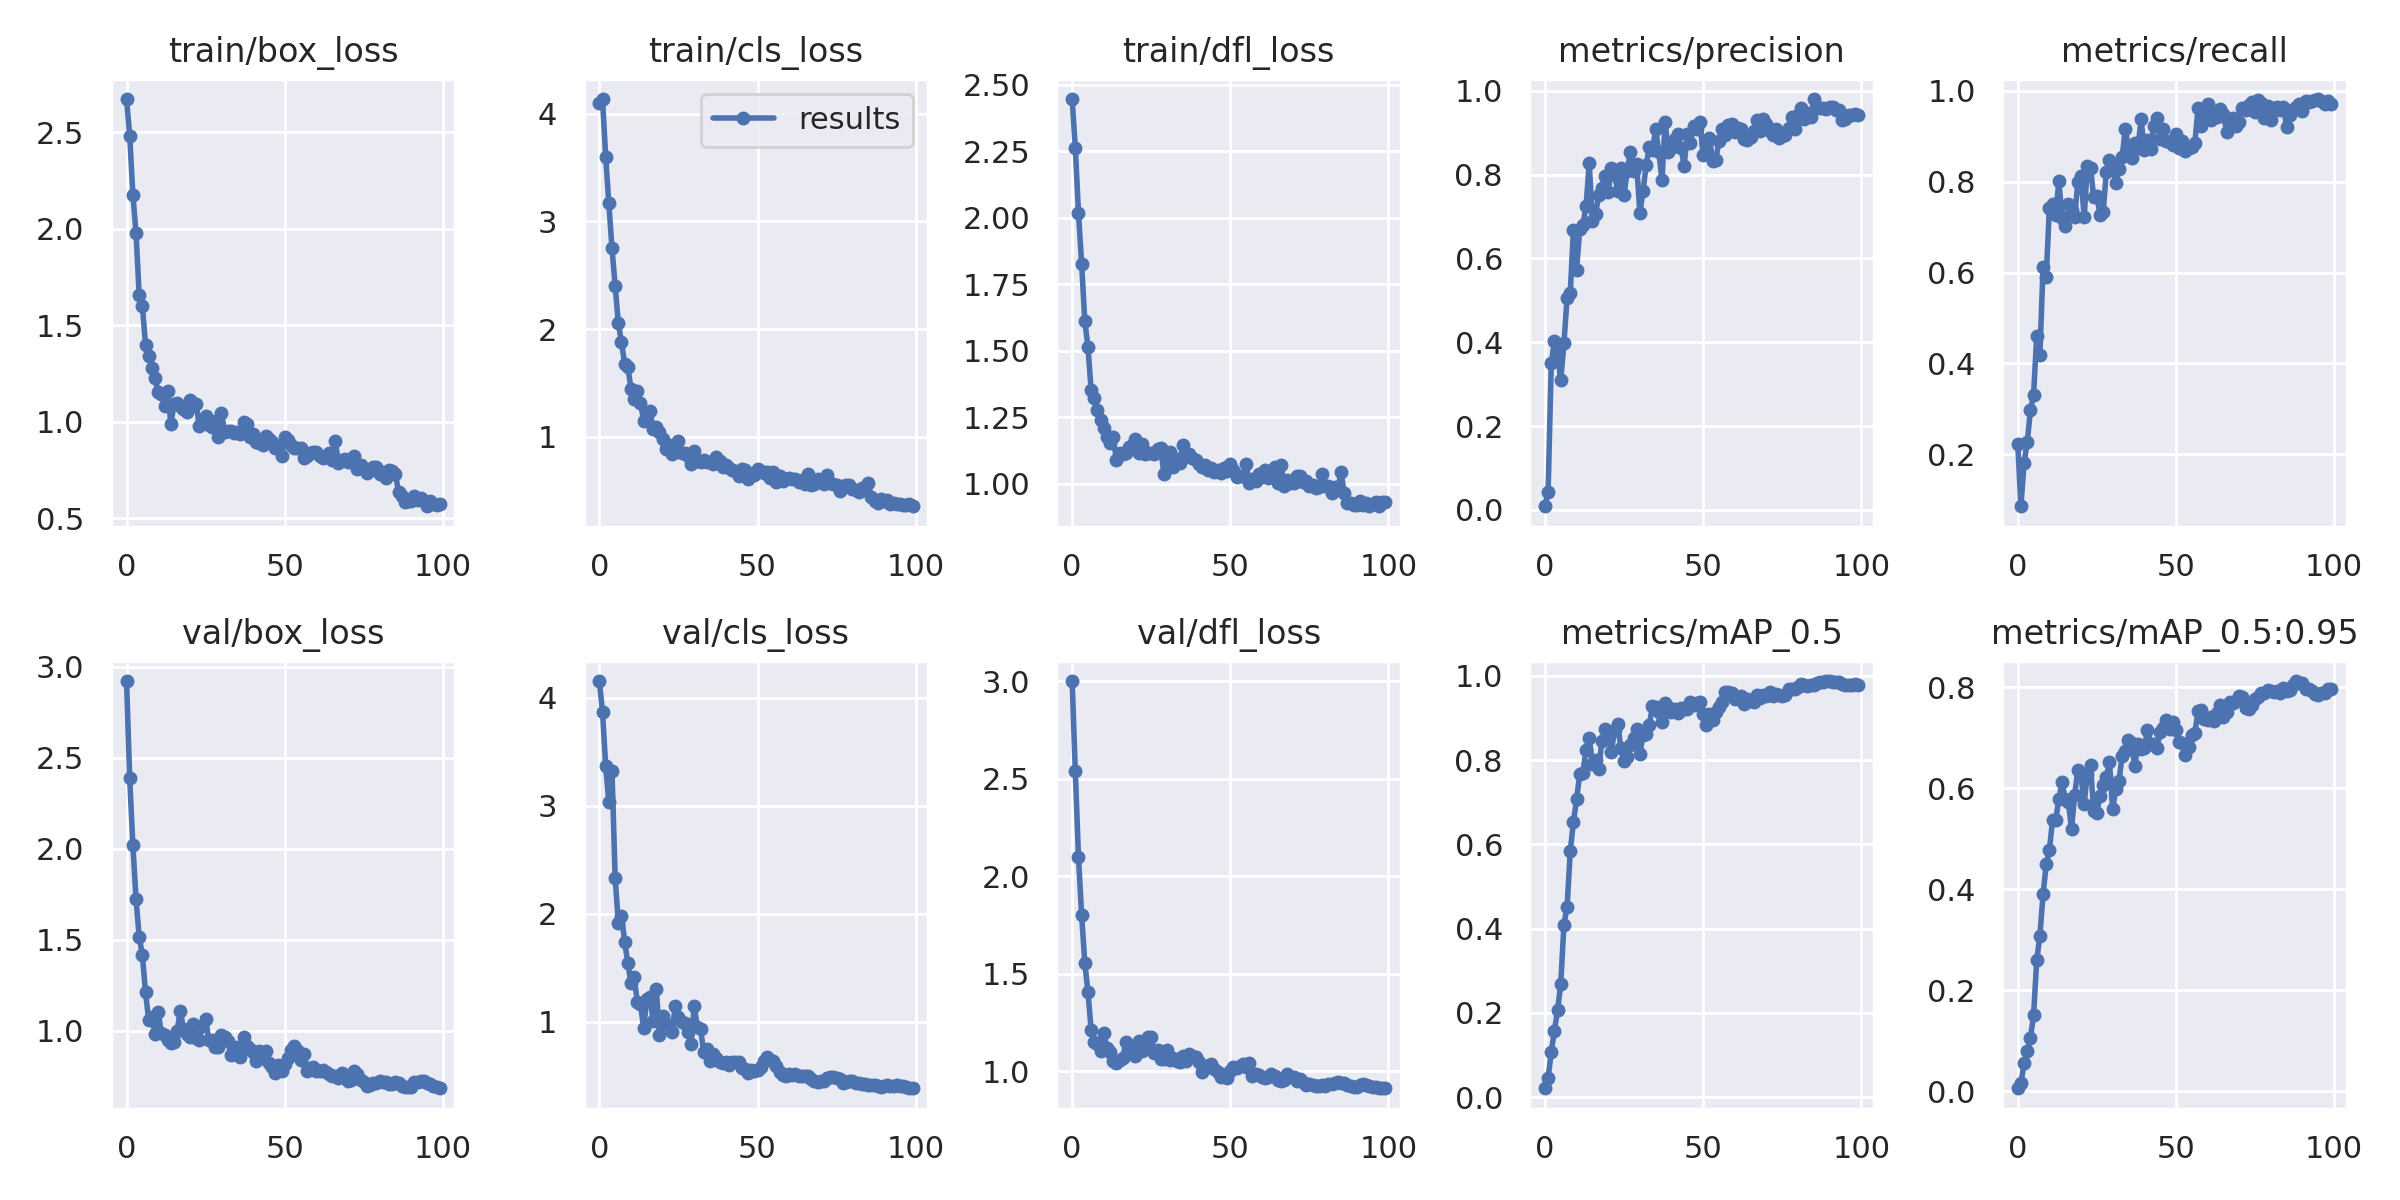

In [5]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

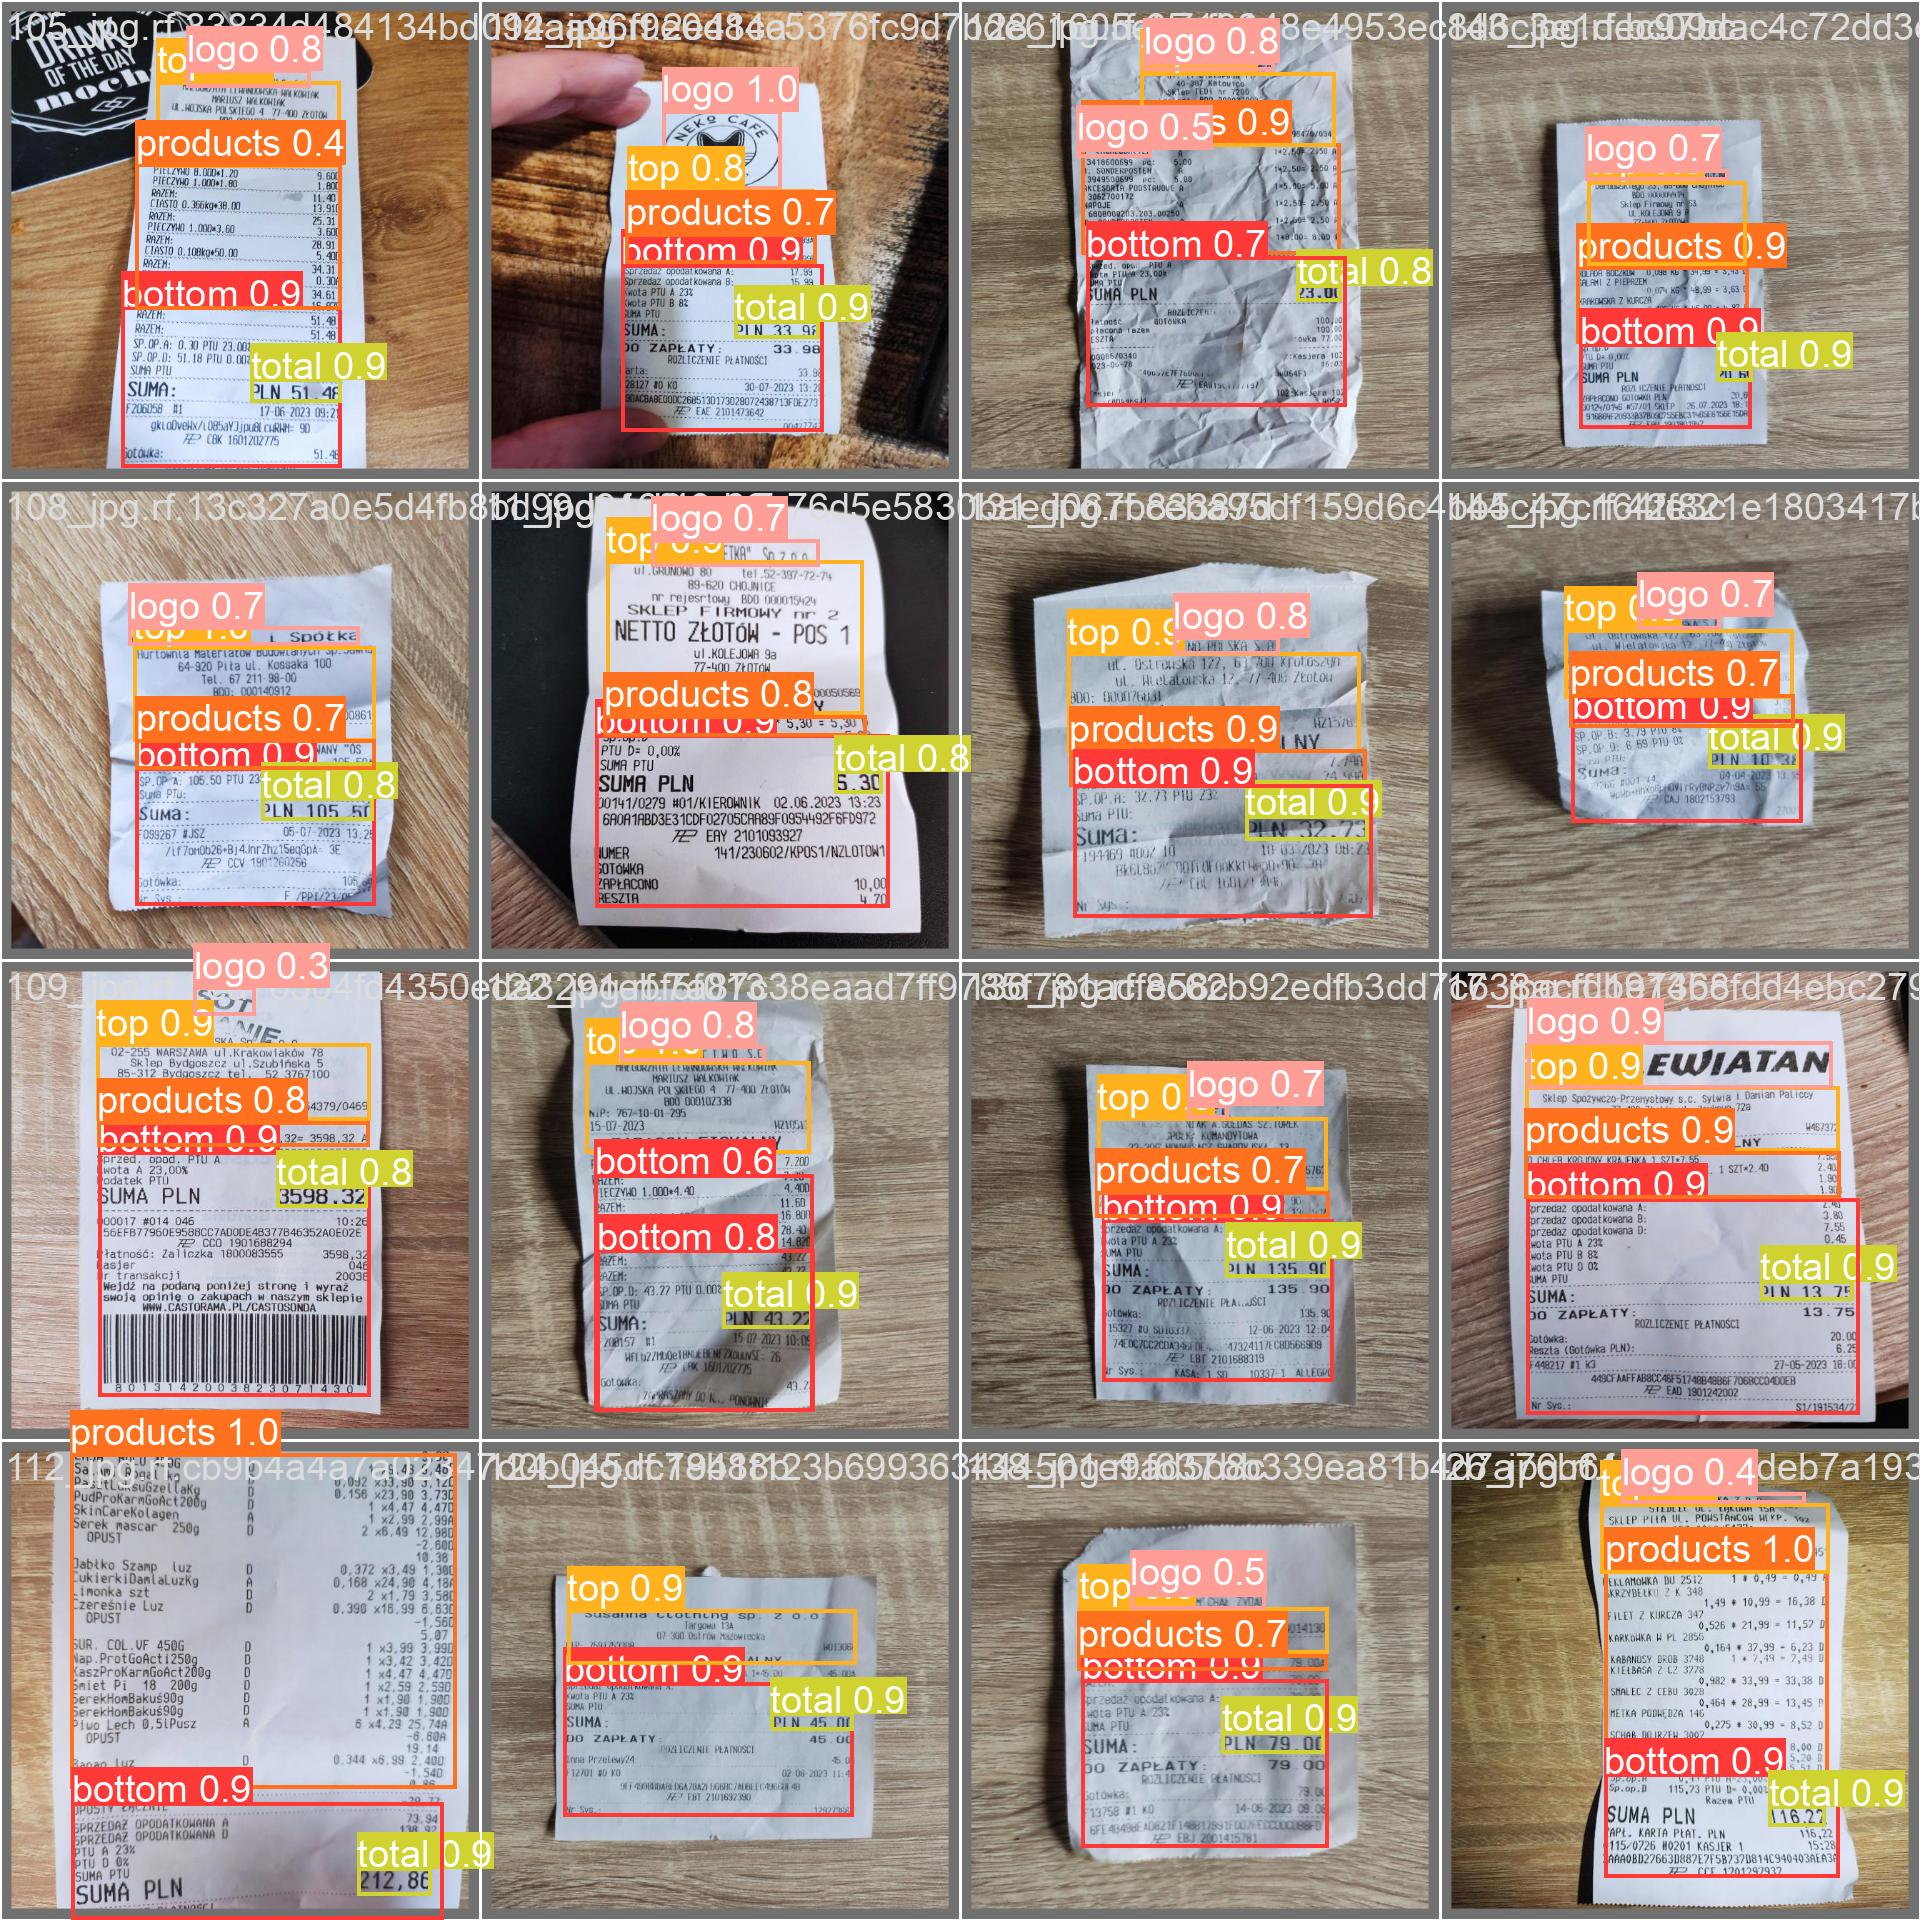

In [6]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

### Macierz błedów dla zbioru uczącego

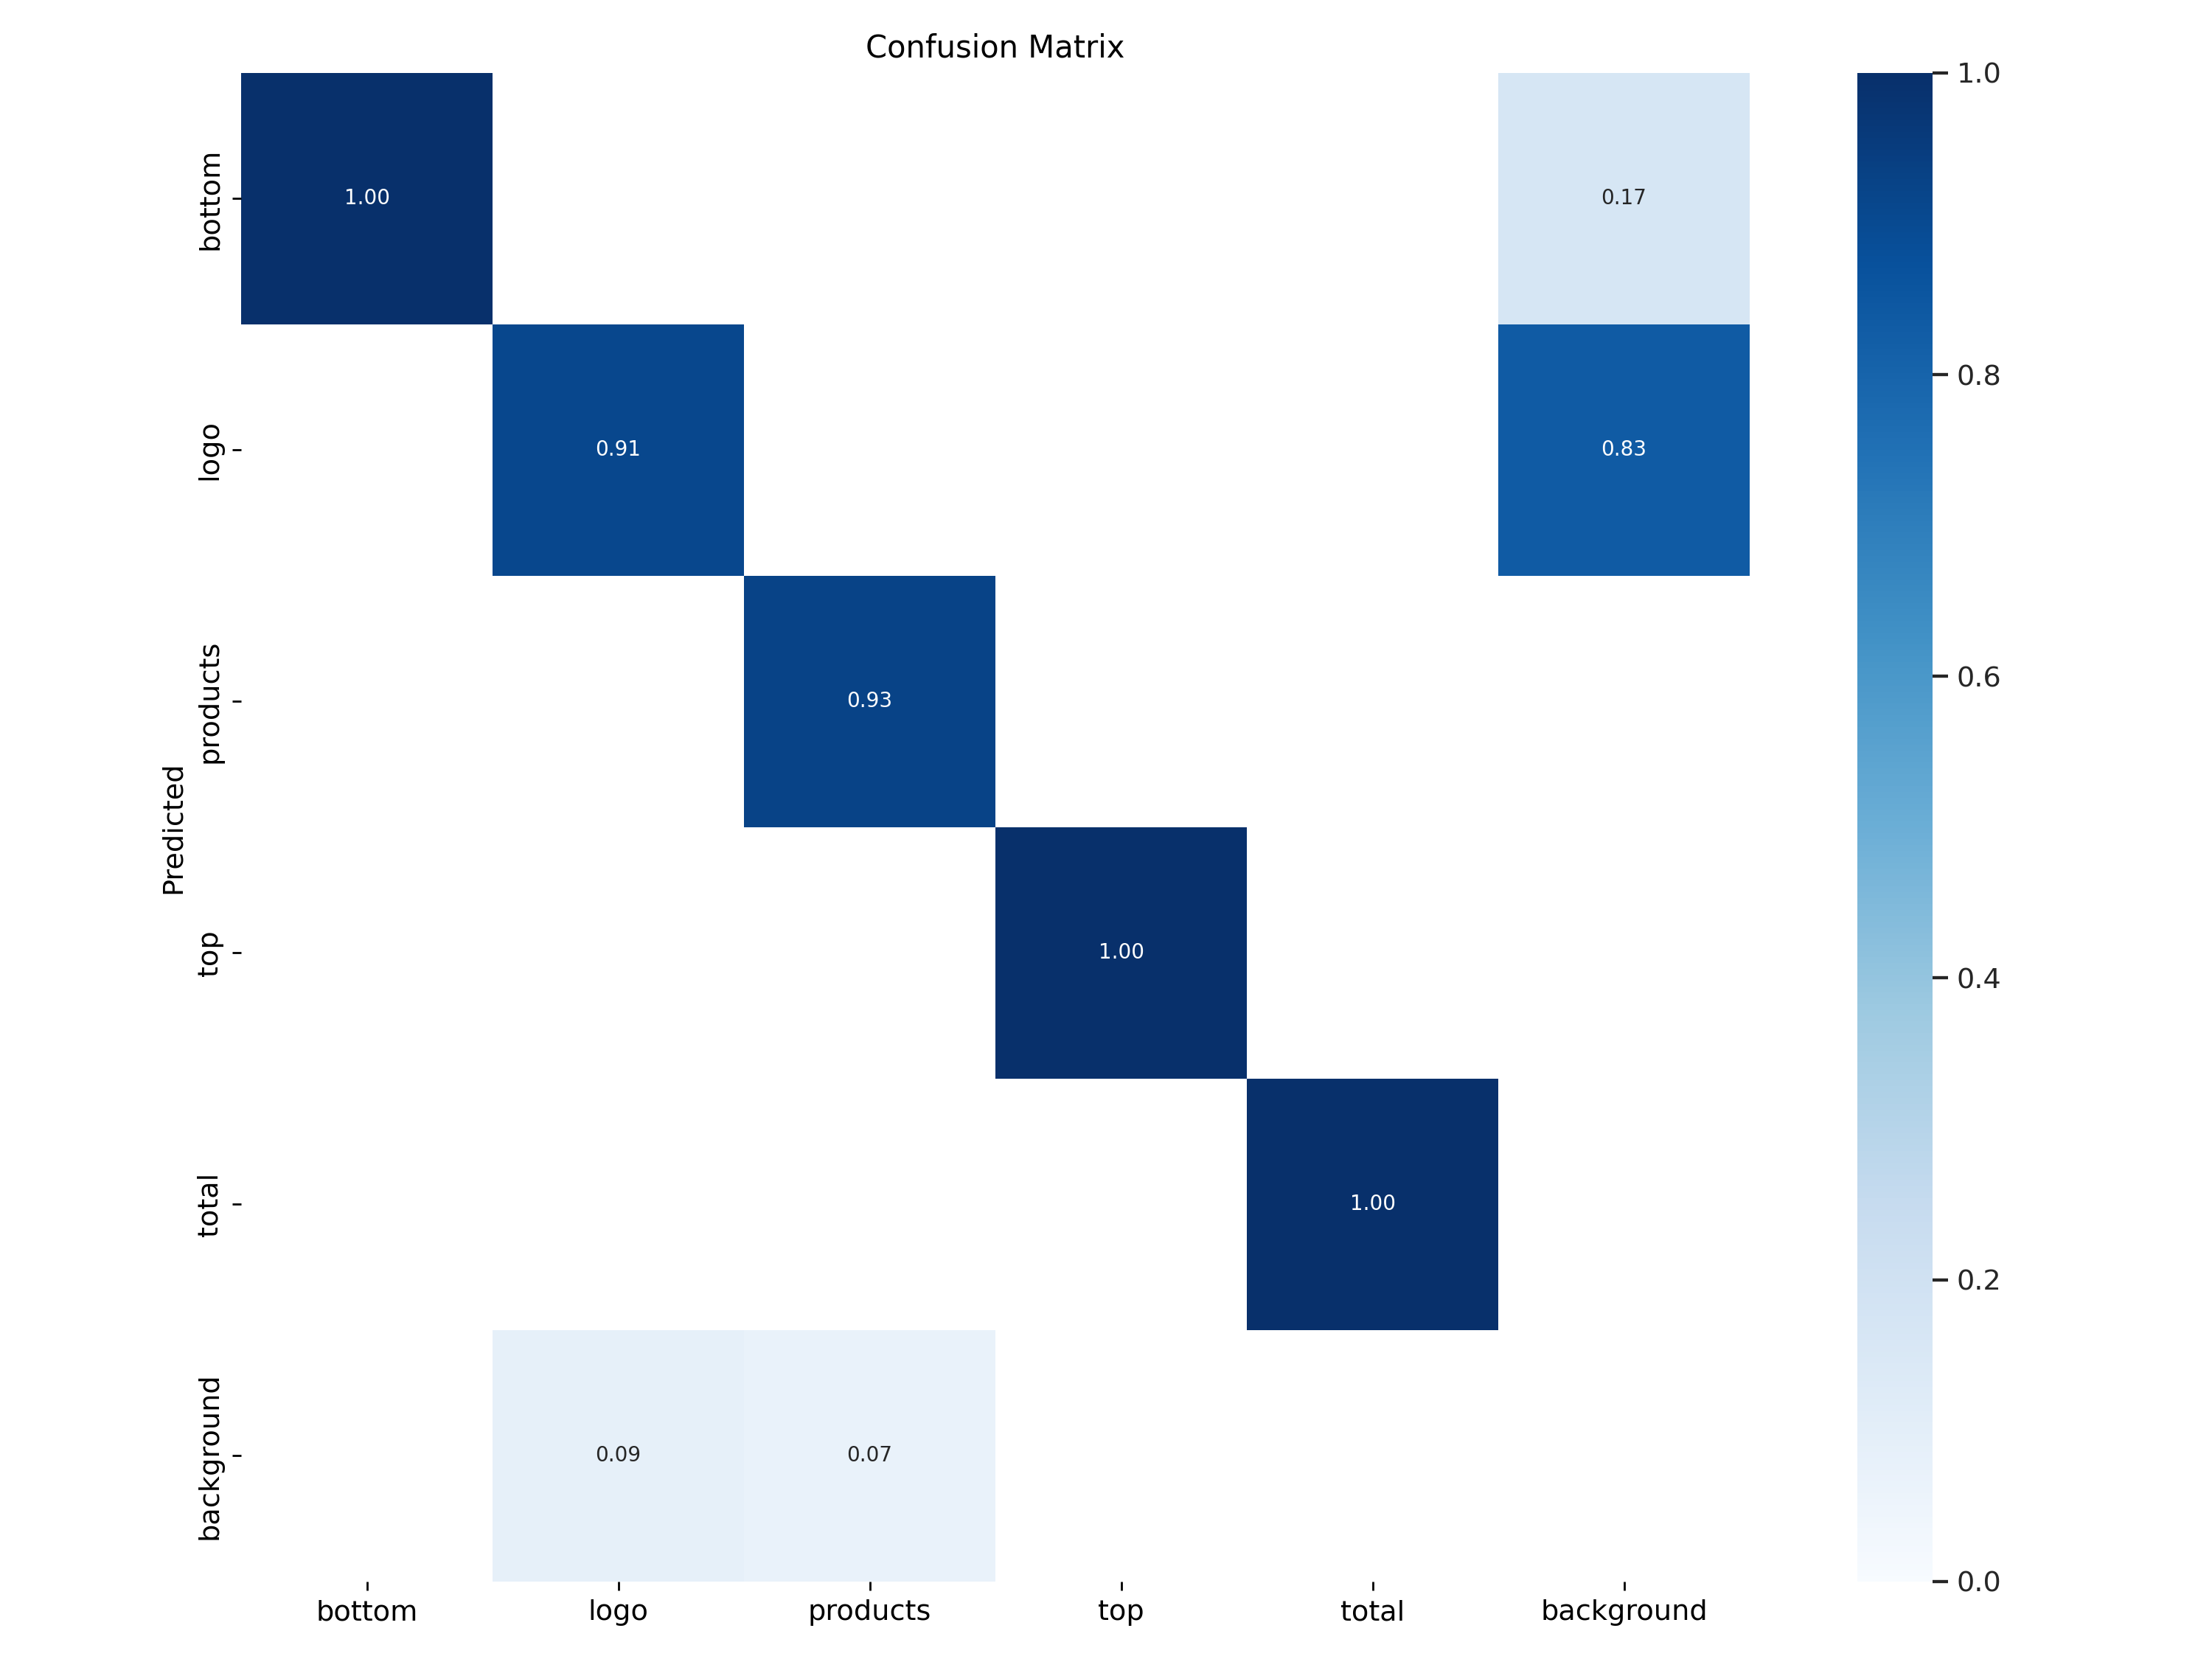

In [7]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

### Wyniki na zbiorze walidacyjnym

In [8]:
%cd /content/yolov9
!python detect.py \
--img 640 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset_location}/valid/images

/content/yolov9
detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/Receipts-2/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
gelan-c summary: 387 layers, 25230943 parameters, 0 gradients, 101.8 GFLOPs
image 1/28 /content/yolov9/Receipts-2/valid/images/105_jpg.rf.33834d484134bd092aa96f9e0d84a17b.jpg: 640x640 1 bottom, 1 logo, 1 products, 1 top, 1 total, 15.2ms
image 2/28 /content/yolov9/Receipts-2/valid/images/108_jpg.rf.13c327a0e5d4fb8bd99d916f49db7812.jpg: 640x640 1 bottom, 1 logo, 1 pr

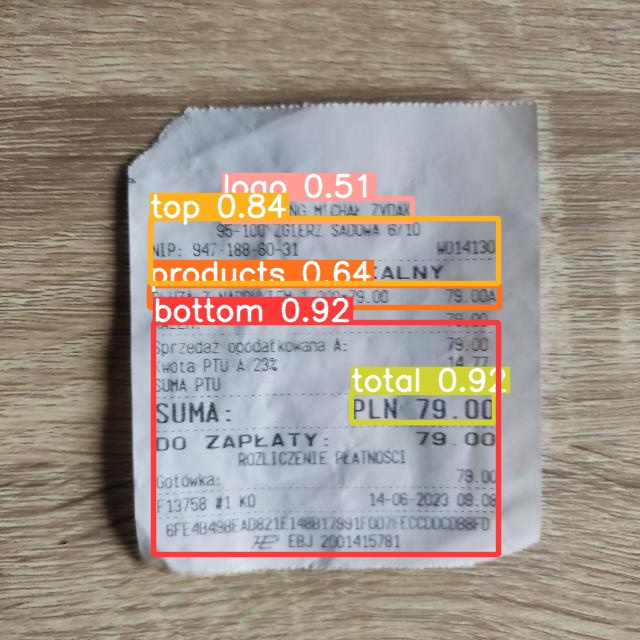

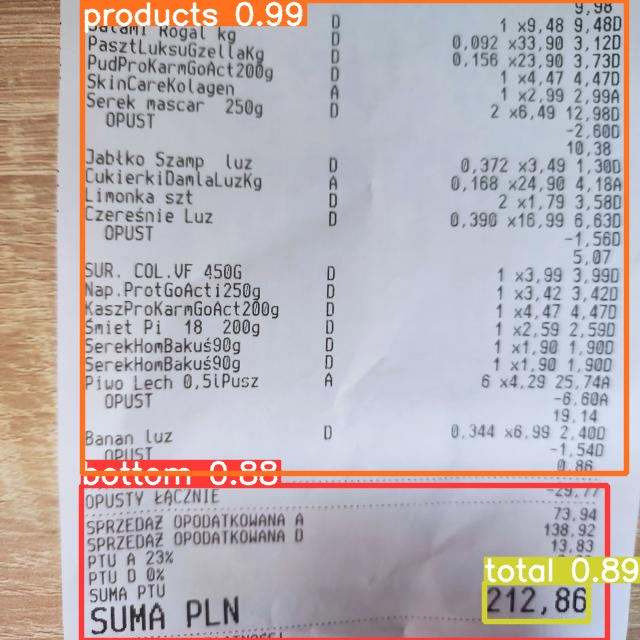

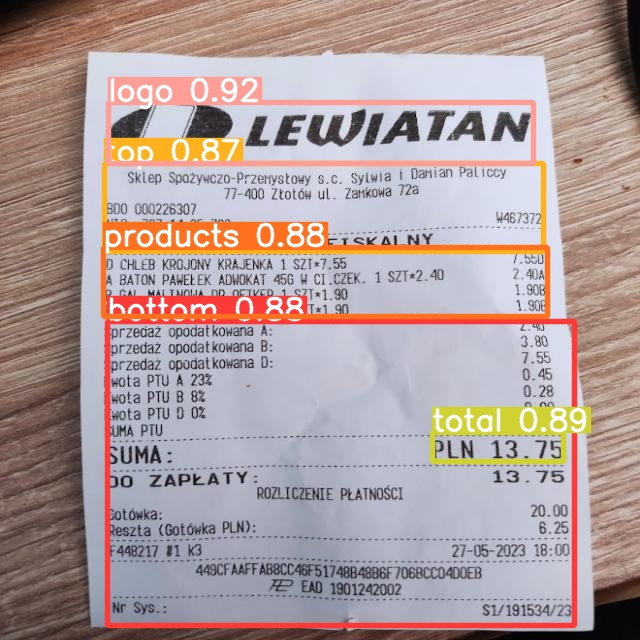

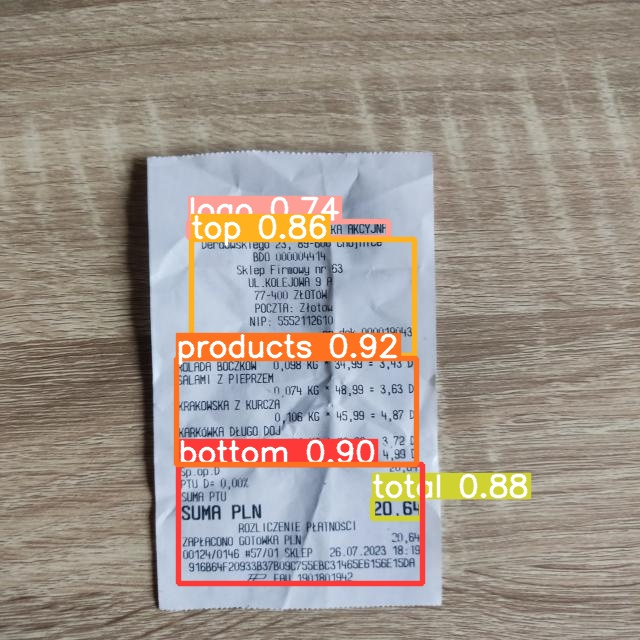

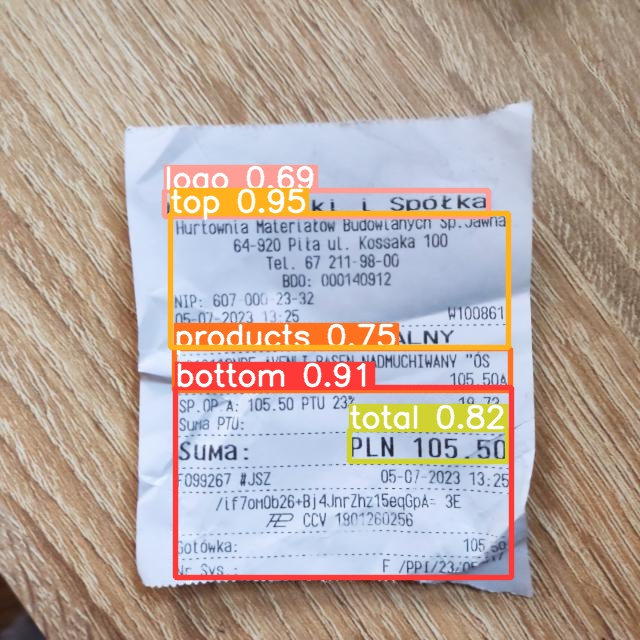

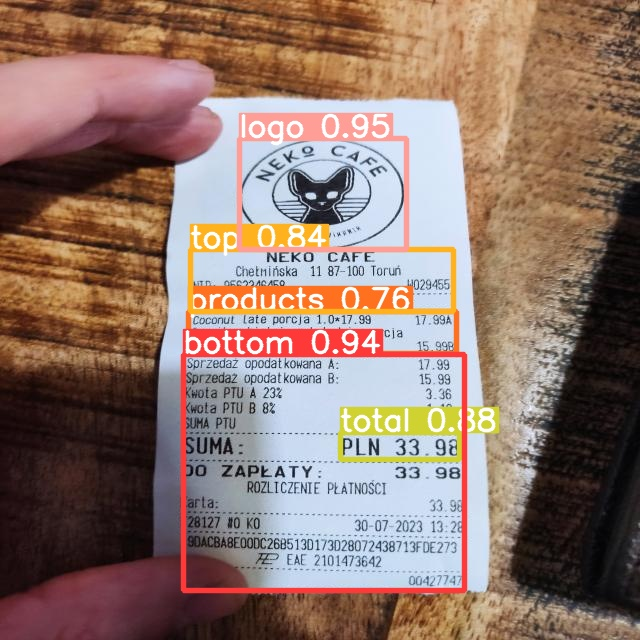

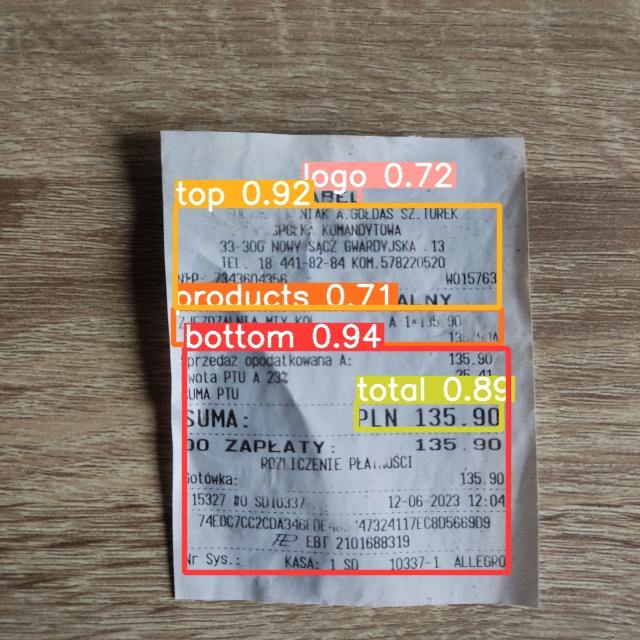

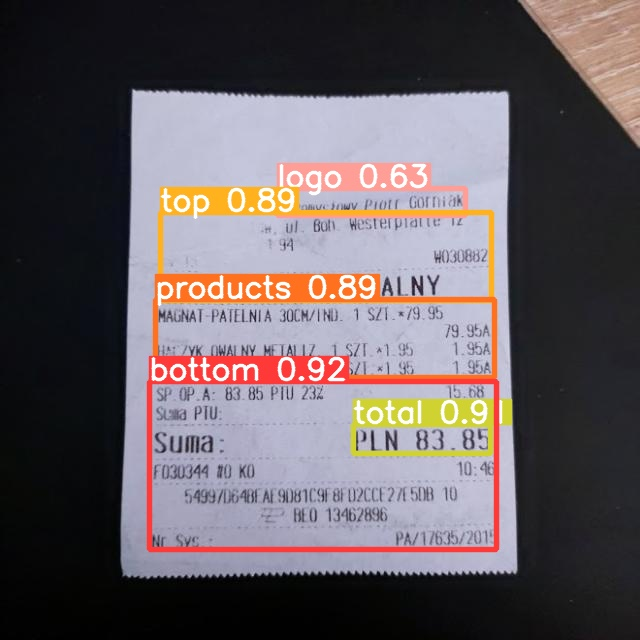

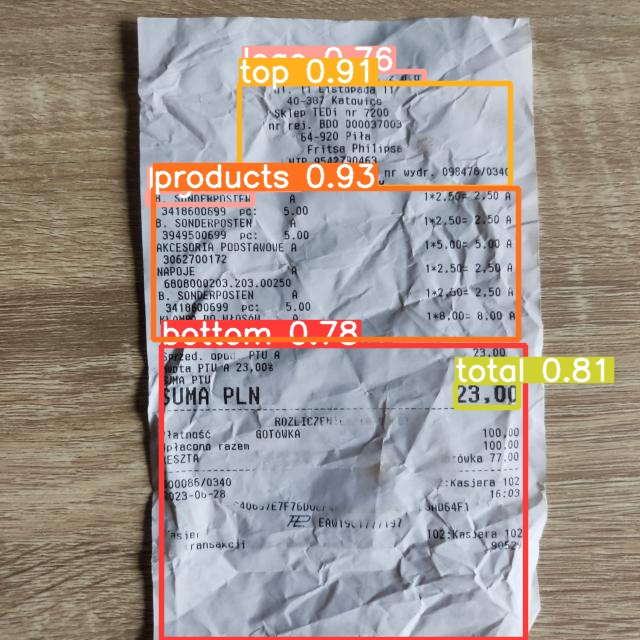

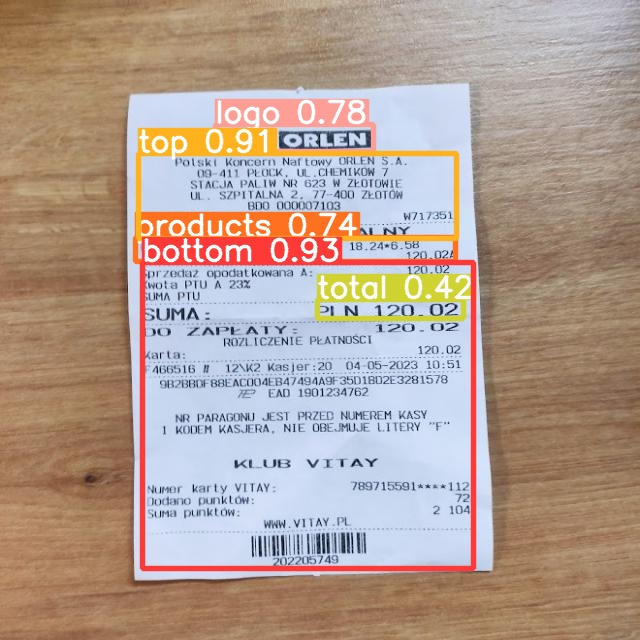

In [9]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [12]:
!python detect.py --weights /content/yolov9/runs/train/exp/weights/best.pt --conf 0.1 --source {HOME}/data/test.jpg --device 0

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/data/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
gelan-c summary: 387 layers, 25230943 parameters, 0 gradients, 101.8 GFLOPs
image 1/1 /content/data/test.jpg: 640x480 1 bottom, 1 logo, 1 products, 1 top, 1 total, 178.5ms
Speed: 0.6ms pre-process, 178.5ms inference, 475.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


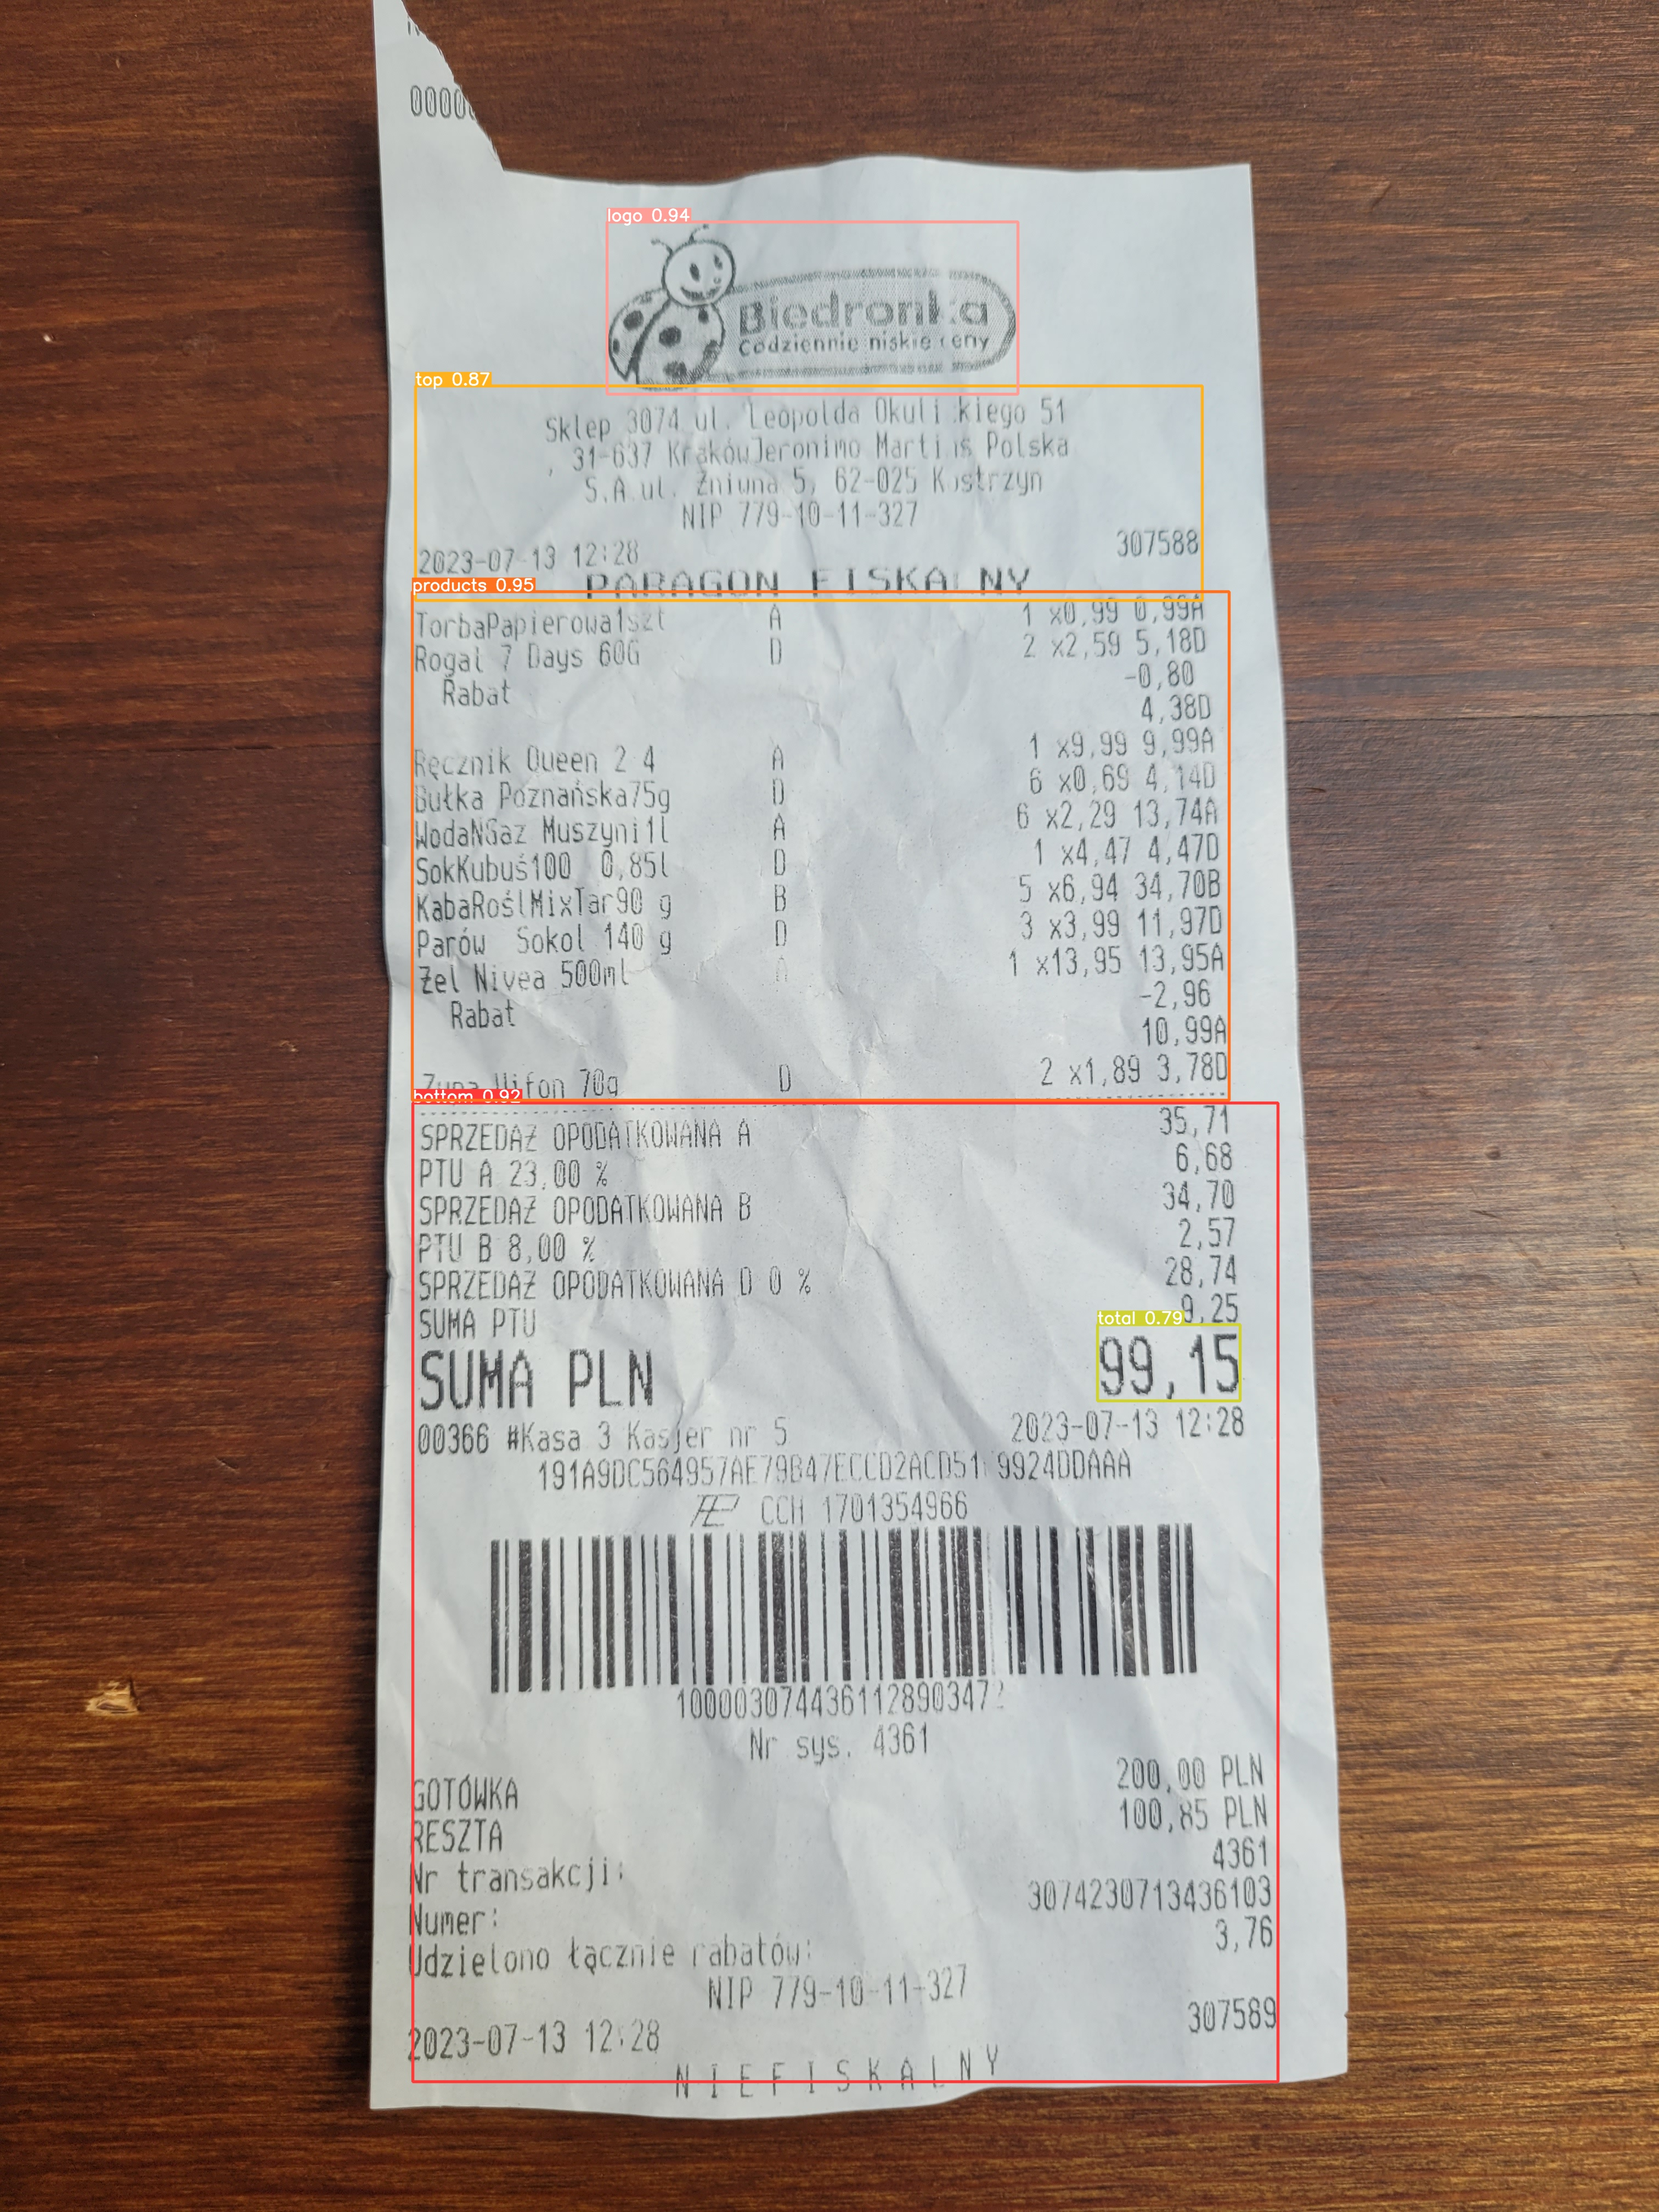

In [13]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/detect/exp3/test.jpg", width=600)